**Convolutional Neural Networks based on cifar 10 dataset**


**Aim**:-

The main aim of this project is to implement a complete end to end CNN Model based on MNIST Handwritten digits dataset.
Steps used in this Algorithm:-

1.    Import all the necessary libraries

2.    Load CIFAR-10 Dataset

3.    Check Dataset Shape

4.    See the training and testing data

5.    Normalize the Data

6.    Convert Labels to One-Hot Encoding

7.    Visualize Sample Image

8.    Build the CNN model

9.    Compile the model

10.    Get the Model Summary

11.   Train the model

12.   Evaluate the model

13.   Make predictions

14.   Visualize predictions

### Step 1:   Import all the necessary libraries

In [51]:
import  numpy             as  np
import  pandas            as  pd
import  matplotlib.pyplot as plt
import  seaborn           as sns

import  tensorflow        as tf

from    tensorflow.keras.datasets  import cifar10
from    tensorflow.keras.models    import Sequential
from    tensorflow.keras.layers    import Conv2D, MaxPooling2D, Dense,Flatten, Dropout, BatchNormalization
from    tensorflow.keras.utils     import to_categorical

### **OBSERVATIONS:**

1.   numpy ---------------> computation of numerical array

2.   pandas --------------> Data Creation and manipulation

3.   matplotlib ----------> Data Visualization

4.   seaborn  ------------> Data correlation

5.   tensorflow ----------> Deep Learning Framework

6.   cifar10  ------------> It is an image dataset

7.   Sequential ----------> Linear stacks of layers

8.   Conv2D --------------> Convolutional layer and forms feature maps

9.   MaxPooling2D --------> Reduces the size of the image

10.  Dense ------------->   Fully Connected dense layer

11.  Flatten -------------> Converts the 2D feature maps into 1D vector

12.  Dropout -------------> Reduces overfitting

13.  BatchNormaliation -------> helps in normalizing the activations

14.  to_categorical ---------> forms one hot encoding of the labels

### Step 2:  Load CIFAR-10 Dataset

In [30]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

###**OBSERVATIONS:**

1. CIFAR-10 dataset is an image dataset that contains 60000 images and 10 output classes.

  (a.)  X_train ---------->   Training Images

  (b.) Y_train  ---------->   Training labels

  (c.) X_test   ---------->   Testing  Images

  (d.) Y_test   ---------->   Testing  labels

### Step 3:  Check Dataset Shape

In [31]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (50000, 32, 32, 3)
Shape of the input testing  data is: (10000, 32, 32, 3)


###**OBSERVATIONS:**

1. Training data has 50000 images with 32 * 32 pixels and 3 channels(RGB)

2. Testing data  has 10000 images with 32 * 32 pixels and 3 channels (RGB)

In [32]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (50000, 1)
Shape of the output testing  data is: (10000, 1)


###**OBSERVATIONS:**

1. Training data has 50000 images with 1 channel

2. Testing data  has 10000 images with 1 channel

### Step 4:  See the training and testing data

In [33]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [34]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

###**OBSERVATIONS:**

1.  All the pixel values in the input images are very high.

2. These pixel values are in the range of 0 to 255

3.  The model training and convergence will be very difficult with these pixel values.

In [35]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [36]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Step 5:  Normalize the Data

In [37]:
X_train = X_train/255.0

X_test  = X_test/255.0

###**OBSERVATIONS:**

1.  The input training and testing pixel values have been scaled from 0--255 to 0--1 by dividing the pixel values by 255.0

2. This is done so that

   (a.)  the neural network model can be trained easily

   (b.)  Convergence speed ca be improved much faster and it can easily reach the global minima.

### Step 6:  Convert Labels to One-Hot Encoding

In [38]:
Y_train = to_categorical(Y_train, 10)

In [39]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [40]:
Y_test = to_categorical(Y_test, 10)

In [41]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

###**OBSERVATIONS:**

1. The output training and testing layer has been converted into one hot encoded form because the output layer has 10 neurons and softmax activation function is applied on the output layer.

### Step 7:  Visualize Sample Image

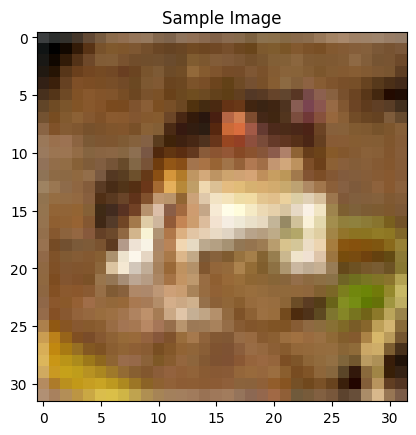

In [42]:
plt.imshow(X_train[0])
plt.title("Sample Image")
plt.show()

###**OBSERVATIONS:**

1. It helps in understanding the Sample Image dataset visually.

### Step 8:  Build the CNN model

In [43]:
### Built a fully CNN Model

model = Sequential([
    ### First Layer of Convolutional Block

    #### Create a first layer of Convolution
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    BatchNormalization()                                                                        ,
    MaxPooling2D(pool_size=(2,2))                                                               ,
    Dropout(0.25)                                                                               ,

    ### Create the second layer of Convolutional Block
    Conv2D(filters=64, kernel_size=(3,3),activation= 'relu',padding='same')                     ,
    BatchNormalization()                                                                        ,
    MaxPooling2D(pool_size=(2,2))                                                               ,
    Dropout(0.25)                                                                               ,

    ### Create the third layer of Convolutional Block
    Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same')                    ,
    BatchNormalization()                                                                        ,
    MaxPooling2D(pool_size=(2,2))                                                               ,
    Dropout(0.25)                                                                               ,

    ### Create the fully dense connected layer
    Flatten()                                                                                   ,
    Dense(128,activation='relu')                                                                ,
    Dropout(0.25)                                                                               ,
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###**OBSERVATIONS:**

1. A fully dense CNN Model is prepared.

2. First layer of Convolutional Block is made

    (a.) The input shape of the image used in this layer is 32 * 32 * 3
    (32 *32 pixels with 3 channels) (RGB).

    (b.) 32 feature maps are formed. Each feature maps is of the size 3 * 3

    (c.) Relu activation function is applied on it to increase the non-linearity of the image.

    (d.) padding = 'same'. It is done to keep all the input feature maps in one same size range.

    (e.) BatchNormalization is applied so as to normalize all the activations of the layer to make the training stable and accurate and even make the convergence faster.

    (f.) MaxPooling is done soas to reduce the size of the input feature maps size to more reduced form.

    (g.) Dropout is done in this layer to prevent overfitting.


2. Second layer of Convolutional Block is made

    (b.) 64 feature maps are formed. Each feature maps is of the size 3 * 3

    (c.) Relu activation function is applied on it to increase the non-linearity of the image.

    (d.) padding = 'same'. It is done to keep all the input feature maps in one same size range.

    (e.) BatchNormalization is applied so as to normalize all the activations of the layer to make the training stable and accurate and even make the convergence faster.

    (f.) MaxPooling is done soas to reduce the size of the input feature maps size to more reduced form.

    (g.) Dropout is done in this layer to prevent overfitting.



3. Third layer of Convolutional Block is made

    (b.) 128 feature maps are formed. Each feature maps is of the size 3 * 3

    (c.) Relu activation function is applied on it to increase the non-linearity of the image.

    (d.) padding = 'same'. It is done to keep all the input feature maps in one same size range.

    (e.) BatchNormalization is applied so as to normalize all the activations of the layer to make the training stable and accurate and even make the convergence faster.

    (f.) MaxPooling is done soas to reduce the size of the input feature maps size to more reduced form.

    (g.) Dropout is done in this layer to prevent overfitting.


4. The 3D feature maps are flattened and converted into 1D row vector.

5. Then the 1D vector becomes the input for the ANN Model.

6. A fully dense connected layer is formed with 128 neurons and relu activation function is applied on it to increase the non-linearity of the image.

7. Dropout function is applied to reduce the overfitting.

8. Then the final output layer is constructed with 10 layers and the softmax activation function applied on it to predict the output probability of each class.






### Step 9: Compile the model

In [44]:
model.compile(
    optimizer = 'adam'                                     ,
    loss      = 'categorical_crossentropy'                 ,
    metrics   = ['accuracy']
)

###**OBSERVATIONS:**

1. The CNN Model has been made ready for training using the following input parameters:-

   (a.)   optimizer = 'adam' ----> It is Adaptive optimizer
    
      .    It is used to update the learning rate so as to bring the faster convergence.


    (b.) loss = 'categorical_crossentropy'

         The loss function used is 'categorical_crossentropy' because the output is in the form of one-hot encoded form of the labels.


    (c.)  metrics = ['accuracy']

        It is used to evaluate the performace of the model.
     

### Step 10:  Get the Model Summary

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

###**OBSERVATIONS:**

It depicts about the

(a.)   Number of parameters

(b.)   Layer shapes

(c.)   Trainable parameters

### Step 11: Train the model

In [46]:
history = model.fit(
    X_train                                  ,
    Y_train                                  ,
    epochs = 20                              ,
    batch_size = 64                          ,
    validation_data = (X_test, Y_test)
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 132ms/step - accuracy: 0.3439 - loss: 1.9032 - val_accuracy: 0.5551 - val_loss: 1.2368
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.5457 - loss: 1.2856 - val_accuracy: 0.5677 - val_loss: 1.2890
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.6103 - loss: 1.0964 - val_accuracy: 0.6359 - val_loss: 1.0331
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step - accuracy: 0.6521 - loss: 0.9805 - val_accuracy: 0.6618 - val_loss: 0.9886
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.6837 - loss: 0.9050 - val_accuracy: 0.7004 - val_loss: 0.8441
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 127ms/step - accuracy: 0.7034 - loss: 0.8440 - val_accuracy: 0.6847 - val_loss: 0.9155
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.7224 - loss: 0.7839 - val_accuracy: 0.7099 - val_loss: 0.8349
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.7367 - l

### **OBSERVATIONS:**

1.  The model has been trained with the help of the following parameters:-

        (a.)  epochs=20 → Train 20 times over data

        (b.)  batch_size=64 → 64 images per update

        (c.)  validation_data → Used to check overfitting


2. After performing the training of the model, the accuarcy of the model hs improved a lot while its loss function has reduced. So the model is working fine.

### Step 12: Evaluate the model

In [47]:
test_loss, test_acc = model.evaluate(X_test,Y_test,verbose=0)

print("Test Accuracy:", test_acc)

print("Test Loss:", test_loss)

Test Accuracy: 0.7692999839782715
Test Loss: 0.6936922073364258


### **OBSERVATIONS:**

1. The test accuracy of the model is very high but its loss function is very less. So the model is working fine.

### Step 13: Make predictions

In [48]:
### predict the probabilities of the output class
Y_pred_prob = model.predict(X_test)

print(Y_pred_prob)



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
[[6.4882822e-04 3.9956380e-05 4.6909533e-02 ... 6.4256671e-04
  3.1994551e-03 8.7224907e-05]
 [4.1440185e-06 2.5486259e-04 1.3705837e-12 ... 7.7541618e-14
  9.9974060e-01 3.2967469e-07]
 [2.1299458e-04 1.4015844e-02 6.8496678e-07 ... 1.2258077e-07
  9.8571754e-01 3.9891209e-05]
 ...
 [8.4852651e-08 7.2052768e-09 4.6177432e-03 ... 3.4609620e-02
  1.8652174e-06 1.6682947e-07]
 [4.1020620e-03 9.8672587e-01 3.8077766e-03 ... 1.3575543e-04
  6.1756029e-05 2.9910789e-04]
 [4.5010329e-10 2.7326297e-10 3.1379201e-07 ... 9.9994987e-01
  1.2651335e-11 5.5771618e-09]]


In [49]:
### Get the index of the maximum probability value and make it as label

Y_pred = np.argmax(Y_pred_prob, axis=1)

print(Y_pred)


### Convert the one hot encoding as labels

Y_true = np.argmax(Y_test,axis=1)

print(Y_true)


[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


### Step 14:  Visualize predictions

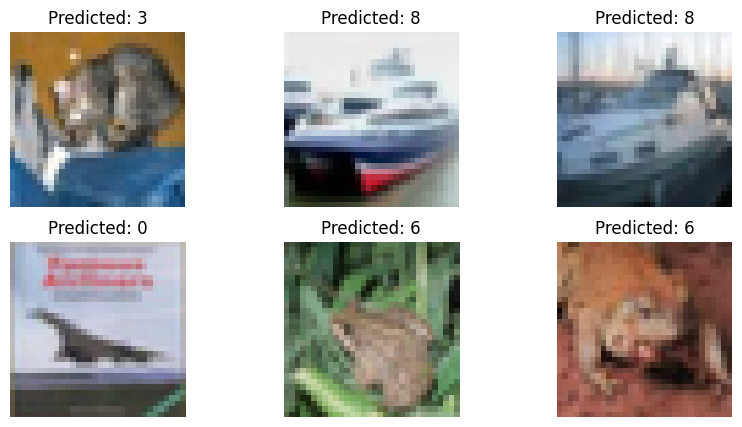

In [50]:
plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {Y_pred[i]}")
    plt.axis('off')

plt.show()


###**OBSERVATIONS:**

1. It displays predicted classes visually.

### **SUMMARY:**

1.   Why CNN for CIFAR10?


.     Images have spatial structure.

.     CNN captures:

      .     Edges

      .     Textures

      .     Shapes

      .     Objects

2.   Why MaxPooling?

      .    Reduces computation

      .    Makes model translation invariant


3.   Why Dropout?

      .    Prevents overfitting

4.   Why BatchNormalization?


      .    Stabilizes training

      .    Reduces internal covariate shift